In [48]:
#importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [49]:
#reading the dataset and storing it as a dataframe
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [50]:
#displaying the dataframe
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [51]:
#displaying the shape
df.shape

(267, 9)

In [52]:
#267 rows, 9 columns

In [53]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [54]:
#checking for null values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [55]:
#no null values, so need to handle them

In [56]:
#changing column names so that they dont have white-spaces, numbers or any special-characters
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [57]:
#displaying the updated dataframe
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [58]:
#converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [59]:
#converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')

In [60]:
#extracting the 'Month' from the Date
df['Month'] =  df['Date'].dt.month

In [61]:
#creating a new column 'MonthNumber' by converting the 'Month' column values to integers
df['MonthNumber'] = df['Month'].apply(lambda x : int(x))

In [62]:
#creating a new column 'MonthName' by converting the 'MonthNumber' column values to the monthNames
df['MonthName'] =  df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [63]:
#ensuring the categorical vairable
df['Region'] = df['Region'].astype('category')

In [64]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,MonthNumber,MonthName
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


## Statistics

In [65]:
#5-number summary
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,MonthNumber
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


In [66]:
#5-number summary of the numerical variables which give some information
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

#rounded to 2 decimal points and transposed to get a horizontal version

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [67]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = df.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


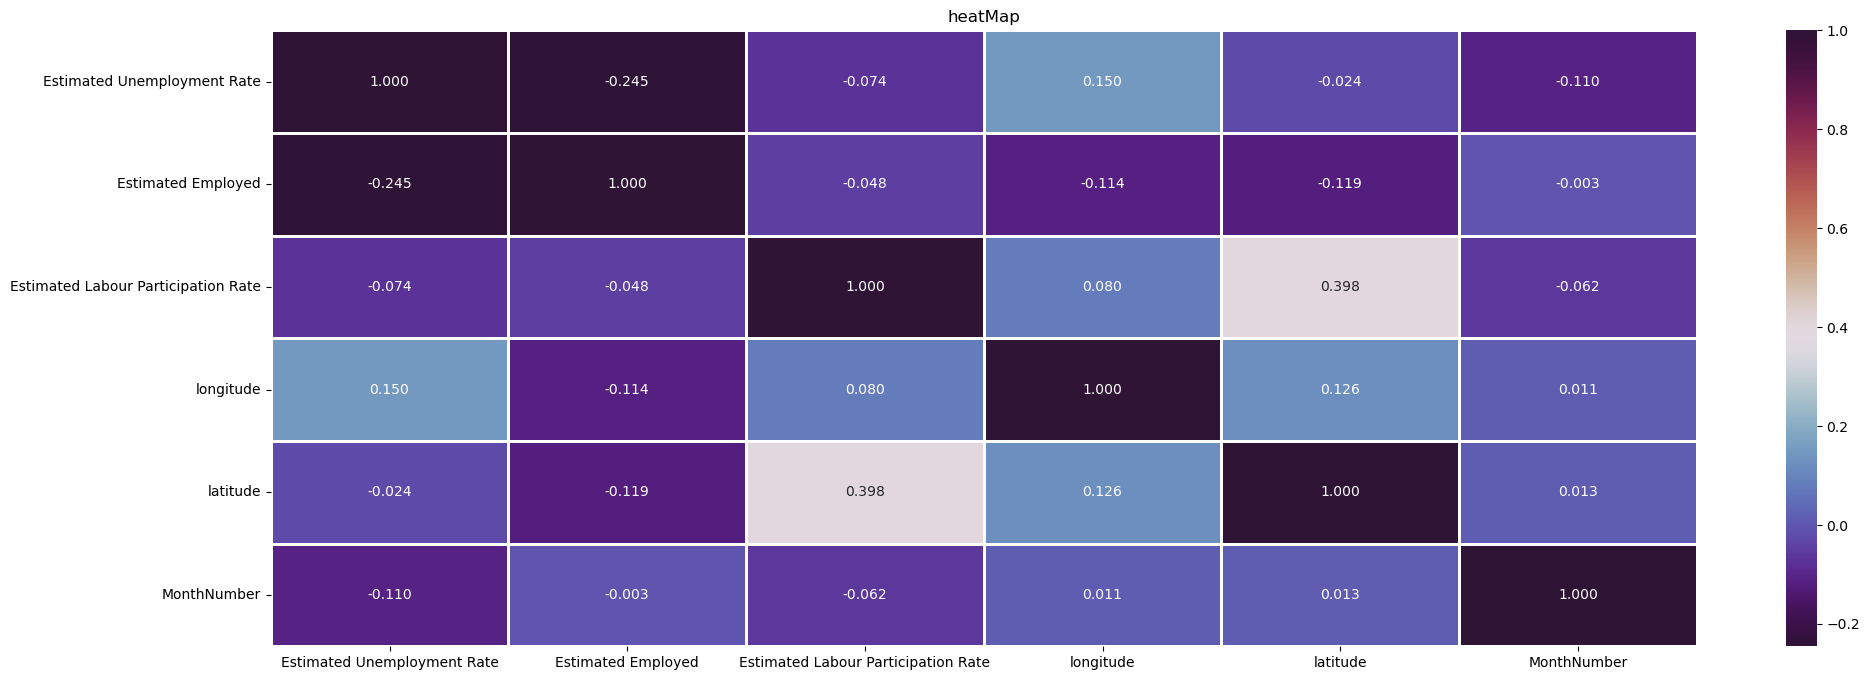

In [68]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values

#dataframe of all the numerical columns
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed', 
              'Estimated Labour Participation Rate', 'longitude', 'latitude', 'MonthNumber']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

## EDA - Exploratory Data Analysis

In [69]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    df,
    x='States',
    y='Estimated Unemployment Rate',
    color='States',
    title='unemploymentRate',
    template='plotly'
)
fig.show()

In [70]:
#creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(df,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

C:\Users\rajug\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [71]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = df[['Estimated Unemployment Rate','States']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('States').mean().reset_index()

#sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF, 
             x='States',
             y='Estimated Unemployment Rate',
             color='States',
             title='State-wise Average Employment Rate')
fig.show()

In [72]:
#plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df, 
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='States',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

## Impact of Lockdown on States Estimated Employed

In [73]:
#creating a scatter geospatial plot
fig = px.scatter_geo(df,'longitude', 'latitude', 
                     color="Region",
                     hover_name="States", 
                     size="Estimated Unemployment Rate",
                     animation_frame="MonthName",
                     scope='asia',
                     title='Lockdown Impact throughout India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

#updating the geospatial axes ranges and ocean color
fig.update_geos(lataxis_range=[5,35], 
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)

fig.show()

In [74]:
#filtering dataset between month 4 and 7 (inclusive) - after lockdown
df47 = df[(df['MonthNumber'] >= 4) & (df['MonthNumber'] <=7)]

#filtering dataset between month 1 and 4 (inclusive) - before lockdown
df14 = df[(df['MonthNumber'] >= 1) & (df['MonthNumber'] <=4)]

In [75]:
#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df47g = df47.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df14g = df14.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
df47g['Unemployment Rate before lockdown'] = df14g['Estimated Unemployment Rate']

#renaming the column values for better understanding
df47g.columns = ['States','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
df47g.head()

,States,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [76]:
#computing the % change in unemployment rate
df47g['% change in unemployment'] = round(df47g['unemploymentRate A/ lockdown'] - df47g['unemploymentRate B/ lockdown']/df47g['unemploymentRate B/ lockdown'],2)

In [77]:
#sorting the values in the "after lockdown dataframe" on the basis of "%change in unemployment"
df47g = df47g.sort_values('% change in unemployment')

In [78]:
#plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
fig = px.bar(df47g, x='States',y='% change in unemployment',
             color='% change in unemployment',
             title='% change in Unemployment A/ Lockdown')

fig.show()

In [79]:
#defining a function to sort the values based on impact
#from the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return '🥲'
    
    elif x <= 20:
        #hardImpactedState
        return '🥲😥'
    
    elif x <= 30:
        #harderImpactedState
        return '🥲😥😖'
    
    elif x <= 40:
        #hardestImpactedState
        return '🥲😥😖🤯'
    
    return x    

In [80]:
#adding a new column to the 'dataframe', classifying the "%change in employment" on the basis of impactStatus
df47g['impactStatus'] = df47g['% change in unemployment'].apply(lambda x:sort_impact(x))

In [81]:
#plotting a "bar-graph" to classify and denote the impack of lockdown on employment for different states
fig = px.bar(df47g, 
             y='States',
             x='% change in unemployment',
             color='impactStatus',
             title='Lockdown Impact on Employment in India')

fig.show()